In [20]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve, 
    auc
)

In [21]:
# 2. 从 seaborn 加载 Titanic 数据集
df = sns.load_dataset('titanic')

# 3. 选择相关特征
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df.dropna(inplace=True)  # 删除包含缺失值的行

In [22]:
# 4. 编码分类特征
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # 将性别映射为数值
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # 将登船港口映射为数值

# 5. 定义特征 (X) 和目标 (y)
X = df.drop('survived', axis=1)  # 特征集
y = df['survived']  # 目标变量

In [23]:
# 6. 标准化特征 —— 对 SVM 来说是必要的
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 对特征进行标准化

# 7. 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [24]:
# 8. 定义 SVM 模型（使用线性核函数）
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# 9. 训练过程：手动模拟“拟合 → 预测”的流程
print("正在训练 SVM 模型...")
svm_model.fit(X_train, y_train)  # 内部会找到最优的分离超平面
print("模型训练成功！")

# 10. 提取模型细节
n_support_vectors = svm_model.n_support_  # 每个类别的支持向量数量
support_indices = svm_model.support_  # 支持向量的索引
print(f"\n每个类别的支持向量数量: {n_support_vectors}")
print(f"支持向量总数: {len(support_indices)}")

正在训练 SVM 模型...
模型训练成功！

每个类别的支持向量数量: [129 131]
支持向量总数: 260


In [25]:
# 注意：必须在初始化 SVC 时就设置 probability=True！
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)

# 重新训练
svm_model.fit(X_train, y_train)

# 再次预测
y_pred = svm_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        80
           1       0.76      0.62      0.68        63

    accuracy                           0.75       143
   macro avg       0.75      0.73      0.74       143
weighted avg       0.75      0.75      0.74       143



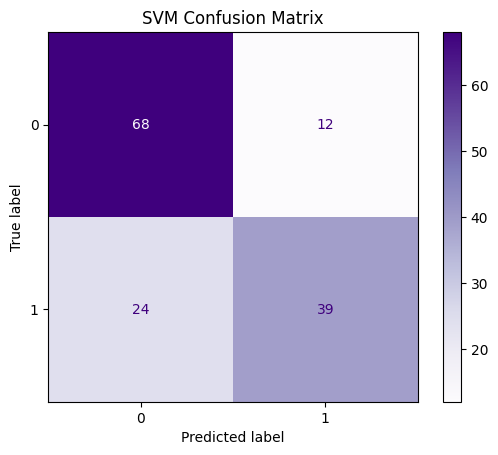

In [29]:
# 输出分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.show()

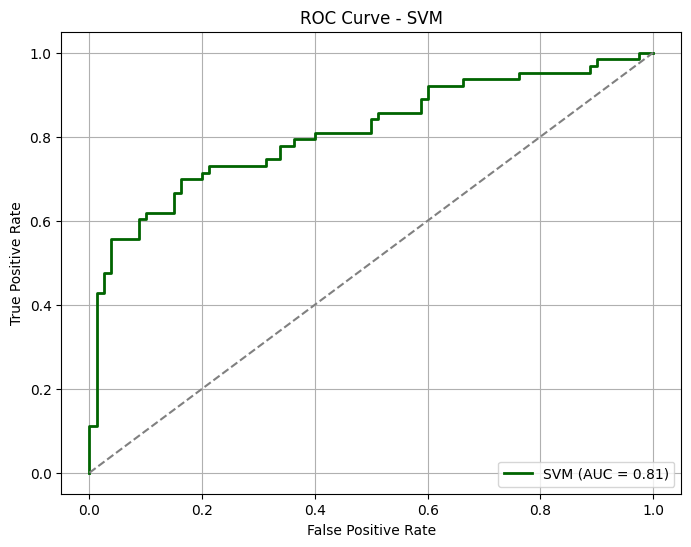

In [28]:
# ROC曲线 & AUC
y_score = svm_model.predict_proba(X_test)[:, 1]  # 获取阳性类的预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()